# Pandas Groupby and friends

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', 
                 parse_dates=['time'], index_col='id')


In [8]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [10]:
df['country'] = df.place.str.split(', ').str[-1]

In [11]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


In [12]:
df_small = df[df.mag<4]
df = df[df.mag>=4]

In [13]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea


<Axes: xlabel='country'>

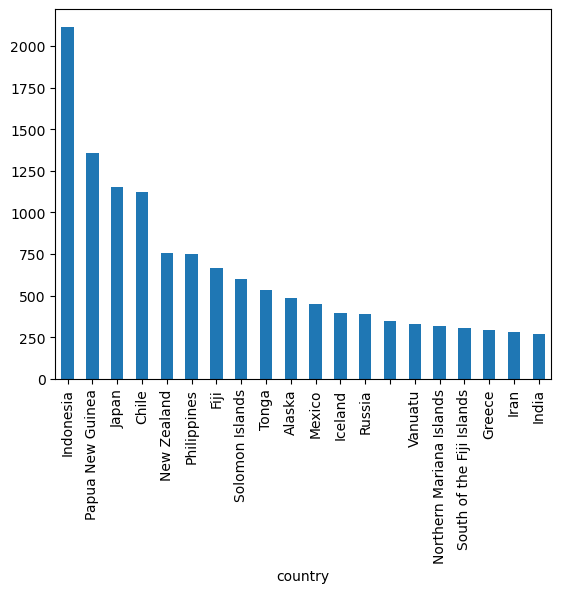

In [18]:
df.groupby('country').mag.count().nlargest(20).plot(kind='bar')

<Axes: xlabel='country'>

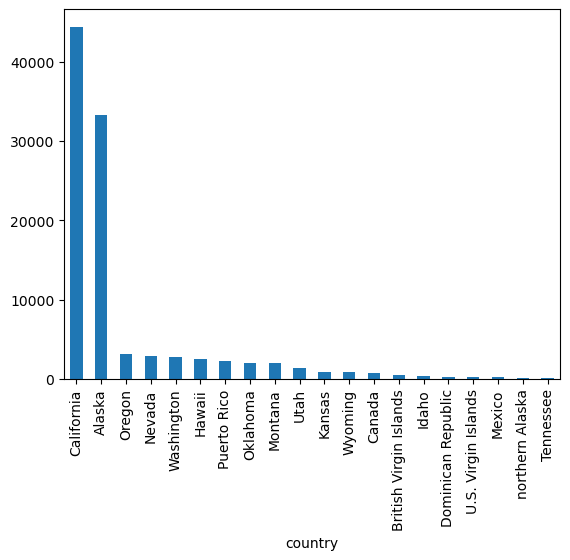

In [19]:
df_small.groupby('country').mag.count().nlargest(20).plot(kind='bar')

In [22]:
gb = df.groupby(df.country)

In [23]:
gb.size()

country
                               344
Afghanistan                    147
Alaska                         486
Albania                         14
Algeria                         15
                              ... 
Zambia                           7
north of Ascension Island        1
northern Mid-Atlantic Ridge      1
south of Panama                  1
western Xizang                   1
Length: 269, dtype: int64

In [27]:
gb.count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
country,,,,,,,,,,,,,,
,344,344,344,344,344,344,0,344,344,344,344,344,344,344
Afghanistan,147,147,147,147,147,147,0,147,147,147,147,147,147,147
Alaska,486,486,486,486,486,486,14,225,178,486,486,486,486,486
Albania,14,14,14,14,14,14,0,6,6,14,14,14,14,14
Algeria,15,15,15,15,15,15,0,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambia,7,7,7,7,7,7,0,7,7,7,7,7,7,7
north of Ascension Island,1,1,1,1,1,1,0,1,1,1,1,1,1,1
northern Mid-Atlantic Ridge,1,1,1,1,1,1,0,1,1,1,1,1,1,1


In [ ]:
list(gb.groups.keys())

In [31]:
for key, group in gb:
#    display(group)
    if key=='Zambia':
        display(group.head())

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000nae1,2014-03-03 02:05:14.940,-14.9909,26.9490,10.00,4.1,mb,NaN,73.0,1.230,1.04,us,2014-05-13T21:36:49.000Z,"12km W of Mumbwa, Zambia",earthquake,Zambia
usb000qkrv,2014-04-21 07:23:22.870,-13.9263,23.3613,10.00,4.6,mb,NaN,95.0,4.862,1.37,us,2014-07-04T01:34:51.000Z,"50km SSE of Zambezi, Zambia",earthquake,Zambia
usc000rl1c,2014-06-08 02:40:23.530,-12.2730,25.8226,10.00,4.1,mb,NaN,96.0,3.768,1.44,us,2014-08-30T17:03:01.000Z,"62km W of Solwezi, Zambia",earthquake,Zambia
usb000rwz0,2014-07-24 19:45:55.260,-14.1291,25.6871,13.98,4.6,mb,NaN,43.0,2.676,0.57,us,2014-10-25T01:49:35.000Z,"75km SSW of Kasempa, Zambia",earthquake,Zambia
usb000rwu1,2014-07-14 13:21:01.630,-13.0528,26.3914,14.13,4.4,mb,NaN,99.0,2.815,1.51,us,2014-10-10T08:02:18.000Z,"75km NE of Kasempa, Zambia",earthquake,Zambia


In [33]:
gb.get_group('Chile').head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlq,2014-01-31 20:00:16.000,-33.6550,-71.9810,25.10,4.5,mb,NaN,NaN,NaN,1.63,us,2014-04-08T01:43:19.000Z,"34km WSW of San Antonio, Chile",earthquake,Chile
usc000mql6,2014-01-31 13:48:23.000,-18.0690,-69.6630,149.10,4.3,mb,NaN,NaN,NaN,1.77,us,2014-04-08T01:43:18.000Z,"17km NW of Putre, Chile",earthquake,Chile
usc000mqk8,2014-01-30 14:20:56.560,-19.6118,-70.9487,15.16,4.1,mb,NaN,159.0,1.227,1.34,us,2014-04-08T01:43:17.000Z,"107km NW of Iquique, Chile",earthquake,Chile
usc000mdi2,2014-01-30 10:02:14.000,-32.1180,-71.7860,25.70,4.5,mwr,NaN,NaN,NaN,1.10,us,2015-01-30T21:28:21.955Z,"64km NW of La Ligua, Chile",earthquake,Chile
usc000mqeh,2014-01-29 18:58:23.000,-18.6610,-69.6440,123.10,4.8,mb,NaN,NaN,NaN,1.52,us,2014-04-08T01:43:16.000Z,"51km S of Putre, Chile",earthquake,Chile


In [34]:
gb.get_group('Mexico') 

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mh8c,2014-01-31 16:04:05.800,16.6660,-94.8550,96.10,4.1,mb,NaN,NaN,NaN,0.59,us,2014-04-08T01:43:18.000Z,"21km N of Union Hidalgo, Mexico",earthquake,Mexico
usc000mh7w,2014-01-28 16:14:27.630,24.2514,-111.8042,10.00,4.0,mb,NaN,244.0,1.374,1.11,us,2014-03-27T18:15:46.000Z,"88km S of Ciudad Constitucion, Mexico",earthquake,Mexico
usc000mhem,2014-01-28 03:04:33.800,14.3260,-93.8790,16.10,4.1,mb,NaN,NaN,NaN,1.60,us,2014-03-27T18:15:45.000Z,"161km SW of Mapastepec, Mexico",earthquake,Mexico
usc000mheb,2014-01-27 04:06:30.320,27.7412,-105.3773,10.00,4.0,md,NaN,134.0,0.842,0.66,us,2014-03-27T18:15:44.000Z,"15km SE of Naica, Mexico",earthquake,Mexico
usb000m8kh,2014-01-26 23:00:55.780,27.7150,-105.6163,12.18,4.1,mb,NaN,84.0,0.778,1.10,us,2014-03-27T18:15:43.000Z,"19km SW of Naica, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usb000t2dz,2014-12-03 05:47:08.600,17.5340,-92.4760,9.10,4.5,mb,NaN,NaN,NaN,1.38,us,2015-02-28T02:16:05.040Z,"14km N of Tila, Mexico",earthquake,Mexico
usc000tdt3,2014-12-03 04:05:56.100,15.9820,-98.4320,17.00,4.2,md,NaN,NaN,NaN,0.75,us,2015-02-28T02:16:05.040Z,"53km S of Cuajinicuilapa, Mexico",earthquake,Mexico
usb000t260,2014-12-02 13:51:11.610,22.0892,-108.3915,10.00,4.3,mb,NaN,216.0,8.376,0.88,us,2015-02-24T00:35:16.040Z,"171km SE of San Jose del Cabo, Mexico",earthquake,Mexico


In [35]:
gb2 = df.groupby(['country','magType'])

In [ ]:
list(gb2.groups.keys())

In [ ]:
gb2.count().head(30)

In [39]:
two_groups = df[(df.country=='Mexico') | (df.country=='Canada')]

In [40]:
two_groups.groupby('country').groups.keys()

dict_keys(['Canada', 'Mexico'])

In [43]:
two_groups.groupby('country').count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
country,,,,,,,,,,,,,,
Canada,48,48,48,48,48,48,0,12,12,48,48,48,48,48
Mexico,447,447,447,447,447,447,1,181,181,447,447,447,447,447


# Aggregation

In [53]:
gb.aggregate('std', numeric_only=True).head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
country,,,,,,,,
,3.257787,20.239332,40.088450,0.370201,NaN,28.326295,2.841962,0.256037
Afghanistan,0.369903,1.192818,70.090820,0.317256,NaN,22.502036,0.774482,0.266169
Alaska,4.919525,171.640567,51.919810,0.461743,45.965886,61.298557,1.082395,0.319971
Albania,0.473710,0.278808,7.484086,0.315271,NaN,15.934240,0.404609,0.338026
Algeria,0.405981,1.657517,3.457435,0.453032,NaN,49.839552,1.115312,0.189028


In [50]:
gb.std(numeric_only=True).head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
country,,,,,,,,
,3.257787,20.239332,40.088450,0.370201,NaN,28.326295,2.841962,0.256037
Afghanistan,0.369903,1.192818,70.090820,0.317256,NaN,22.502036,0.774482,0.266169
Alaska,4.919525,171.640567,51.919810,0.461743,45.965886,61.298557,1.082395,0.319971
Albania,0.473710,0.278808,7.484086,0.315271,NaN,15.934240,0.404609,0.338026
Algeria,0.405981,1.657517,3.457435,0.453032,NaN,49.839552,1.115312,0.189028


In [56]:
gb.mag.aggregate('max').head(25)

country
                                 6.9
Afghanistan                      5.6
Alaska                           7.9
Albania                          5.0
Algeria                          5.5
American Samoa                   4.6
Angola                           4.1
Anguilla                         5.0
Antarctica                       4.8
Argentina                        6.2
Arizona                          4.7
Aruba                            4.6
Ascension Island region          5.1
Australia                        4.7
Azerbaijan                       5.5
Azores Islands region            5.4
Azores-Cape St. Vincent Ridge    4.6
Balleny Islands region           6.2
Banda Sea                        5.3
Bangladesh                       4.3
Barbados                         6.5
Barbuda                          4.3
Bay of Bengal                    4.4
Bermuda                          4.2
Bhutan                           4.2
Name: mag, dtype: float64

In [57]:
gb.mag.aggregate('max').nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

In [58]:
gb.mag.max().nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

In [59]:
gb.mag.mean().nlargest(10)

country
South Napa Earthquake          6.020000
Bouvet Island region           5.750000
South Georgia Island region    5.450000
Barbados                       5.400000
Easter Island region           5.162500
Malawi                         5.100000
Drake Passage                  5.033333
North Korea                    5.000000
Saint Lucia                    5.000000
Pacific-Antarctic Ridge        4.923214
Name: mag, dtype: float64

In [60]:
gb.mag.aggregate(['min','max','mean']).head()

,min,max,mean
country,,,
,4.0,6.9,4.572384
Afghanistan,4.0,5.6,4.340816
Alaska,4.0,7.9,4.430247
Albania,4.0,5.0,4.335714
Algeria,4.0,5.5,4.466667


In [62]:
gb.mag.aggregate(['min','max','mean']).nlargest(10, 'max')

,min,max,mean
country,,,
Chile,4.0,8.2,4.491281
Alaska,4.0,7.9,4.430247
Solomon Islands,4.0,7.6,4.585333
Papua New Guinea,4.0,7.5,4.540990
El Salvador,4.0,7.3,4.412941
Mexico,4.0,7.2,4.319933
Fiji,4.0,7.1,4.426466
Indonesia,4.0,7.1,4.412193
Southern East Pacific Rise,4.2,7.0,4.902128


<Axes: xlabel='country'>

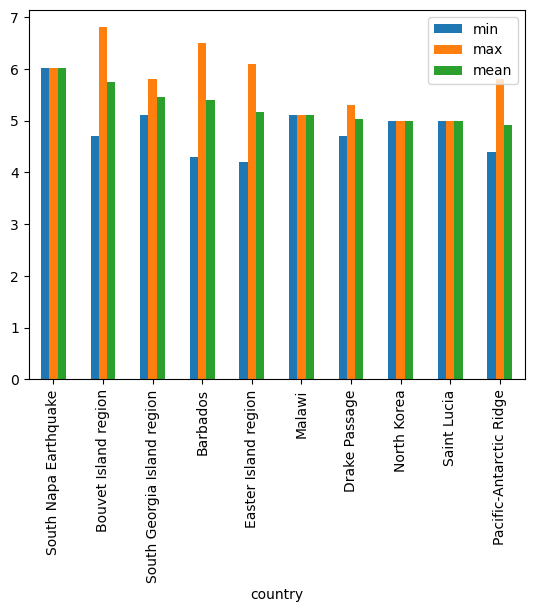

In [64]:
gb.mag.aggregate(['min','max','mean']).nlargest(10, 'mean').plot(kind='bar')

In [66]:
gb2.agg('mean', numeric_only=True).head(30)

latitude   longitude       depth       mag  \
country        magType                                                
               mb      -55.070842  -23.408891   34.886626  4.520365   
               mwb     -56.063775  -26.967175   19.242500  5.575000   
               mww     -56.105529  -27.127586   40.471429  5.871429   
Afghanistan    mb       36.460875   70.532626  148.273688  4.304965   
               mwb      36.878500   71.098800   83.670000  5.200000   
               mwc      36.522500   66.582400   21.630000  5.400000   
               mwr      36.677950   70.611400   54.640000  4.850000   
               mww      36.228150   70.708300  147.485000  5.400000   
Alaska         mb       52.285138   26.036768   67.495857  4.375703   
               ml       63.663233 -147.093142   39.250000  4.467949   
               mwb      52.046420  105.523260   34.446000  5.660000   
               mwr      57.772175 -143.302950    8.387500  4.475000   
               mww      54.087537  -74.846963   77.456250  5.937500   
Albania        mb       41.147613   19.656800   16.416250  4.400000   
               ml       40.827700   19.884750    1.510000  4.050000   
               mwr      41.329500   19.617150   14.295000  4.350000   
Algeria        mb       36.380817    2.566083   13.077500  4.391667   
               ml       36.534600    3.062800   13.940000  4.000000   
               mwr      35.785400    0.240600   10.000000  4.800000   
               mww      36.856100    3.181000   10.000000  5.500000   
American Samoa mb      -15.909500 -171.735000   24.100000  4.600000   
Angola         mb      -12.452400   14.757200   15.000000  4.100000   
Anguilla       mb       18.604500  -62.874300   42.940000  4.500000   
               md       18.739900  -62.920000    5.300000  4.000000   
               mwr      18.396950  -62.612450   39.530000  4.800000   
Antarctica     mb      -65.379330  112.008050   17.633000  4.480000   
Argentina      mb      -26.620150  -67.194834  175.379771  4.346286   
               md      -29.720500  -68.305000  132.500000  4.100000   
               ml      -26.377000  -67.510667  177.566667  4.133333   
               mwr     -31.648500  -69.354500  111.500000  4.500000   

                              nst         gap       dmin       rms  
country        magType                                              
               mb             NaN   91.981763   5.681210  0.672036  
               mwb            NaN   37.000000   5.749250  0.783750  
               mww            NaN   33.142857   5.679286  0.817143  
Afghanistan    mb             NaN   76.794326   1.156433  0.995816  
               mwb            NaN   21.000000   0.485000  1.340000  
               mwc            NaN   79.000000   2.817000  0.910000  
               mwr            NaN   43.500000   0.805000  0.935000  
               mww            NaN   20.000000   0.902000  0.875000  
Alaska         mb             NaN  130.202020   0.884727  0.918261  
               ml       65.642857   94.628564   0.589295  0.851795  
               mwb            NaN   40.200000   0.823400  0.844000  
               mwr            NaN   58.500000   0.300500  1.205000  
               mww            NaN   30.333333   0.672500  1.018750  
Albania        mb             NaN   48.750000   0.541500  1.090000  
               ml             NaN         NaN        NaN  0.525000  
               mwr            NaN   45.000000   0.364500  1.092500  
Algeria        mb             NaN   85.250000   1.294917  1.122500  
               ml             NaN  179.000000   2.836000  1.240000  
               mwr            NaN   39.000000   2.056000  0.860000  
               mww            NaN   36.000000   2.608000  0.900000  
American Samoa mb             NaN  343.000000  45.181000  0.230000  
Angola         mb             NaN  110.000000   7.241000  0.890000  
Anguilla       mb             NaN   47.000000   0.583000  1.090000  
               md          

# Transformation

In [67]:
def standardize(x):
    return (x-x.mean())/x.std()

In [70]:
gb.mag.transform(standardize).tail(50)

id
usb000t208    0.236381
usb000t203    2.268292
usc000t7bn   -0.811554
usb000t1zx    0.527924
usc000t7c6   -0.632070
usc000t7bp   -0.604849
usc000t7c3   -0.361183
usc000t7c0   -1.068165
usc000t7bm   -0.874224
usc000t7bl   -0.315373
usc000t6yi   -0.049880
usb000t1zr    1.090121
usb000t1zg   -0.839061
usb000t1zf    1.844668
usc000t6yu    0.049564
usc000t6yc   -0.874224
usc000t6y9   -0.404722
usc000t6yj    0.066389
usc000t6yr    0.235326
usc000t6y7   -0.831361
usb000t1k5    1.090121
usc000t6yt   -0.831361
usb000t1js    1.090121
usc000t6yx   -0.877284
usc000t6y6   -0.066100
usc000t6y5   -0.604849
usb000t1j2    3.166396
usb000t1jx    0.203275
usb000t1iw    2.582849
usb000t1ij    1.997084
usc000t6ym   -0.025547
usb000t1ig    0.945613
usb000t1hu    0.481801
usc000t6y3   -0.987553
usb000t1hf         NaN
usb000t1hd   -0.562726
usc000t6yp   -0.707107
usc000t6yw   -0.860767
usc000t6yg   -0.811554
usc000t6yk   -0.315373
usb000t1gy   -0.415892
usb000t1h0    1.361718
usc000t6y8   -1.158669
usc000t6

In [71]:
gb.mag.apply(standardize).tail(50)

country                         id        
Western Indian-Antarctic Ridge  usc000t9tt    0.562468
                                usc000td8u   -0.449975
                                usc000td52   -1.462417
                                usc000tclj   -0.112494
                                usc000t4rc    1.912392
Yemen                           usc000n4ye   -1.353454
                                usc000rc1s    0.970659
                                usc000rmbg    0.970659
                                usc000rmmz   -0.888632
                                usc000rlqa   -0.423809
                                usc000rlqc   -0.423809
                                usc000rlqd    0.041014
                                usc000rn25    0.041014
                                usc000rn2a   -0.423809
                                usc000rcga    0.041014
                                usc000rit9   -1.353454
                                usc000rit8   -0.423809
                      

# Time Grouping

In [72]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

In [73]:
df

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,64756,2.622,-73.74,41.79,2.5,-2.1,0.2,0.3,0.0,7.50,...,0.275,0.248,0.191,0.192,1.3,1.4,1.9,3.2,4.7,NaN
2018-12-28,64756,2.622,-73.74,41.79,11.6,1.9,6.8,7.6,11.5,0.45,...,0.295,0.261,0.193,0.191,2.9,2.7,2.5,3.1,4.5,NaN
2018-12-29,64756,2.622,-73.74,41.79,11.3,-2.1,4.6,6.3,0.0,4.89,...,0.295,0.270,0.208,0.191,4.5,4.4,4.0,3.8,4.5,NaN


<Axes: xlabel='LST_DATE'>

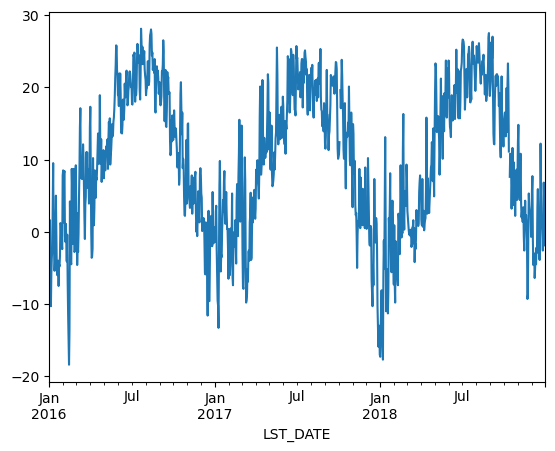

In [74]:
df.T_DAILY_MEAN.plot()

In [75]:
df.groupby(df.index.month).mean(numeric_only=True)

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
1,64756.0,2.488667,-73.74,41.79,2.924731,-7.122581,-2.100000,-1.905376,2.478495,5.812258,...,0.240250,0.200698,0.153645,0.160859,0.150538,0.248387,0.788172,1.766667,3.364516,NaN
2,64756.0,2.487882,-73.74,41.79,6.431765,-5.015294,0.712941,1.022353,4.077647,8.495882,...,0.247714,0.210044,0.159153,0.163889,1.216471,1.169412,1.278824,1.617647,2.442353,NaN
3,64756.0,2.488667,-73.74,41.79,7.953763,-3.035484,2.455914,2.643011,2.788172,13.211290,...,0.228612,0.203634,0.157796,0.160366,3.450538,3.400000,3.372043,3.480645,3.777419,NaN
4,64756.0,2.488667,-73.74,41.79,14.793333,1.816667,8.302222,8.574444,2.396667,15.295889,...,0.214067,0.195844,0.153878,0.158100,9.415556,9.117778,8.455556,7.618889,6.670000,NaN
5,64756.0,2.488667,-73.74,41.79,21.235484,8.460215,14.850538,15.121505,3.015054,17.288602,...,0.204796,0.187097,0.148871,0.155720,16.934409,16.640860,15.612903,14.208602,12.455914,NaN
6,64756.0,2.488667,-73.74,41.79,25.627778,11.837778,18.733333,19.026667,3.053333,21.913333,...,0.136911,0.135211,0.129422,0.152711,22.403333,22.126667,20.956667,19.448889,17.552222,NaN
7,64756.0,2.488667,-73.74,41.79,28.568817,15.536559,22.054839,22.012903,3.865591,21.570645,...,0.105806,0.095204,0.114419,0.150000,25.448387,25.318280,24.163441,22.746237,21.068817,NaN
8,64756.0,2.488667,-73.74,41.79,27.473118,15.351613,21.410753,21.378495,4.480645,18.493333,...,0.156161,0.132333,0.128796,0.158750,24.758065,24.829032,24.116129,23.325806,22.301075,NaN
9,64756.0,2.488667,-73.74,41.79,24.084444,12.032222,18.057778,17.866667,3.730000,13.625667,...,0.136900,0.126422,0.121356,0.154000,21.028889,21.168889,20.921111,20.834444,20.707778,NaN


In [77]:
monthly_climatology = df.groupby(df.index.month).aggregate({'T_DAILY_MEAN':'mean','T_DAILY_MAX':'max','T_DAILY_MIN':'min'})

<Axes: xlabel='LST_DATE'>

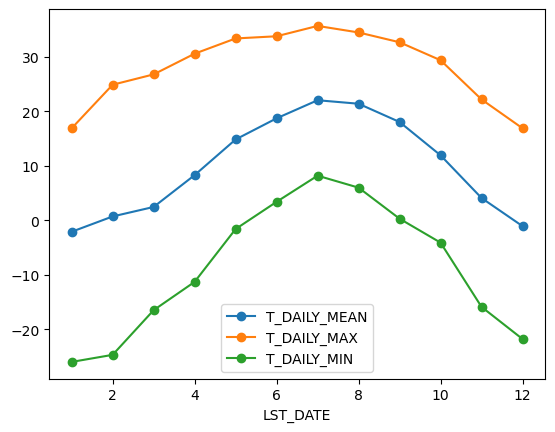

In [78]:
monthly_climatology.plot(marker='o')

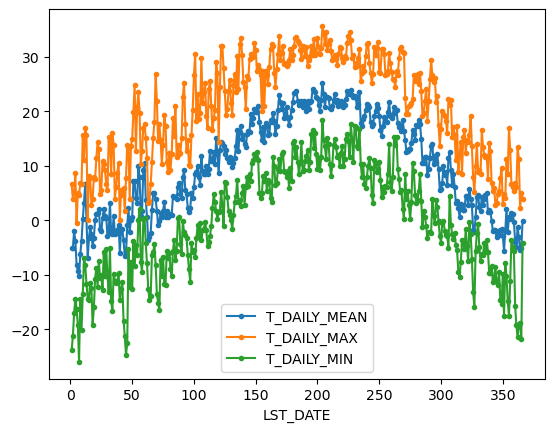

In [79]:
daily_climatology = df.groupby(df.index.dayofyear).aggregate({'T_DAILY_MEAN':'mean','T_DAILY_MAX':'max','T_DAILY_MIN':'min'}).plot(marker='.')

<Axes: xlabel='LST_DATE'>

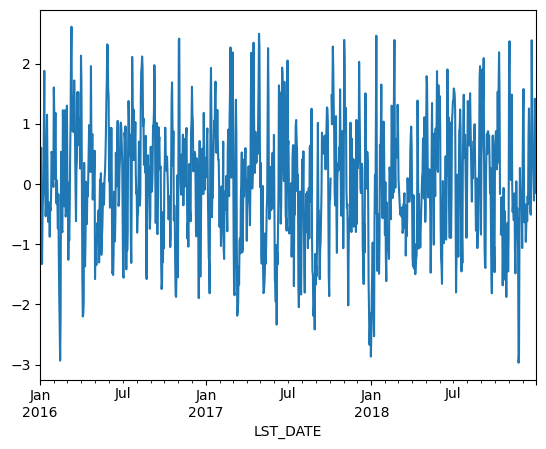

In [80]:
anomaly = df['T_DAILY_MEAN'].groupby(df.index.month).transform(standardize)
anomaly.plot()

<Axes: xlabel='LST_DATE'>

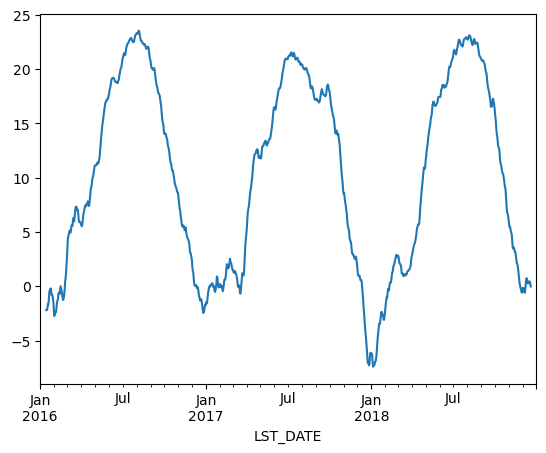

In [82]:
df.rolling(30, center=True, min_periods=28).T_DAILY_MEAN.mean().plot()